In [35]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import (classification_report, 
                             accuracy_score, 
                             f1_score, 
                             confusion_matrix, 
                             precision_recall_fscore_support, 
                             precision_score, 
                             recall_score)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## KNN classification of Tumor data

For this lab we will use a dataset on tumor classification with a KNN model. 

The data has the following properties:
- 683 entries
- 10 columns (10 integer)
- The data is already scaled between 0 and 10, so no scaling is necessary
- There are 65% benign vs 35% cancerous, which is slightly imbalanced, but not problematic

In [36]:
df = pd.read_csv("./data/tumor.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Clump        683 non-null    int64
 1   UnifSize     683 non-null    int64
 2   UnifShape    683 non-null    int64
 3   MargAdh      683 non-null    int64
 4   SingEpiSize  683 non-null    int64
 5   BareNuc      683 non-null    int64
 6   BlandChrom   683 non-null    int64
 7   NormNucl     683 non-null    int64
 8   Mit          683 non-null    int64
 9   Class        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [37]:
df.describe().T.drop(columns=["count", "25%", "75%"])

,mean,std,min,50%,max
Clump,4.442167,2.820761,1.0,4.0,10.0
UnifSize,3.150805,3.065145,1.0,1.0,10.0
UnifShape,3.215227,2.988581,1.0,1.0,10.0
MargAdh,2.830161,2.864562,1.0,1.0,10.0
SingEpiSize,3.234261,2.223085,1.0,2.0,10.0
BareNuc,3.544656,3.643857,1.0,1.0,10.0
BlandChrom,3.445095,2.449697,1.0,3.0,10.0
NormNucl,2.869693,3.052666,1.0,1.0,10.0
Mit,1.603221,1.732674,1.0,1.0,10.0
Class,0.349927,0.477296,0.0,0.0,1.0


In [38]:
target_variable = "Class"

X = df.drop(columns=[target_variable])
y = df[target_variable]

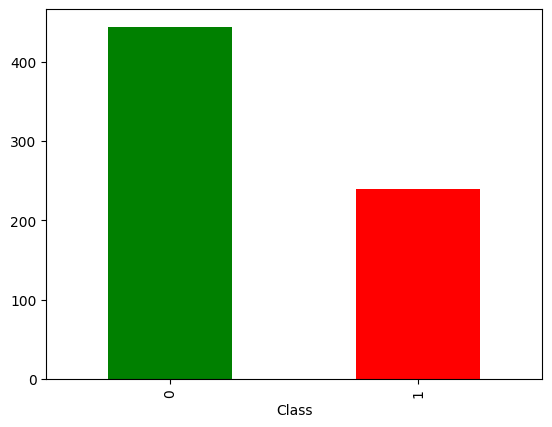

In [39]:
y.value_counts().plot.bar(color=['green', 'red']);

## Training the model

First we split up the data in train/test sets and then fit a preliminary model.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    stratify=y, 
    random_state = 123)

In [57]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [58]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)
preds = knn_model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.9416058394160584,
 'recall': 0.875,
 'precision': 0.9545454545454546,
 'f1score': 0.9130434782608695}

For a simple model, using only 2 NNBs, this is quite impressive performance. Let's see what happens when we increase the amount of neighbours.

First, let's create a helper function

In [59]:
def train_and_evaluate(k):
    model = KNeighborsClassifier(n_neighbors=k)
    model = model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return evaluate_metrics(y_test, preds)

In [60]:
train_and_evaluate(5)

{'accuracy': 0.9781021897810219,
 'recall': 0.9791666666666666,
 'precision': 0.9591836734693877,
 'f1score': 0.9690721649484536}

Ok, slightly better. But not very informative. Let's try for a bunch of different values of k to find out which performs best. And let's plot the results so we can easily read off the best value of K.

In [61]:
max_k = 50
f1_scores = []

for k in range(1, max_k+1):
    f1_scores.append([k, train_and_evaluate(k)['f1score']])
    
f1_scores = pd.DataFrame(f1_scores, columns=['K', "F1 Score"]).set_index("K")

Text(0.5, 1.0, 'KNN F1 Score')

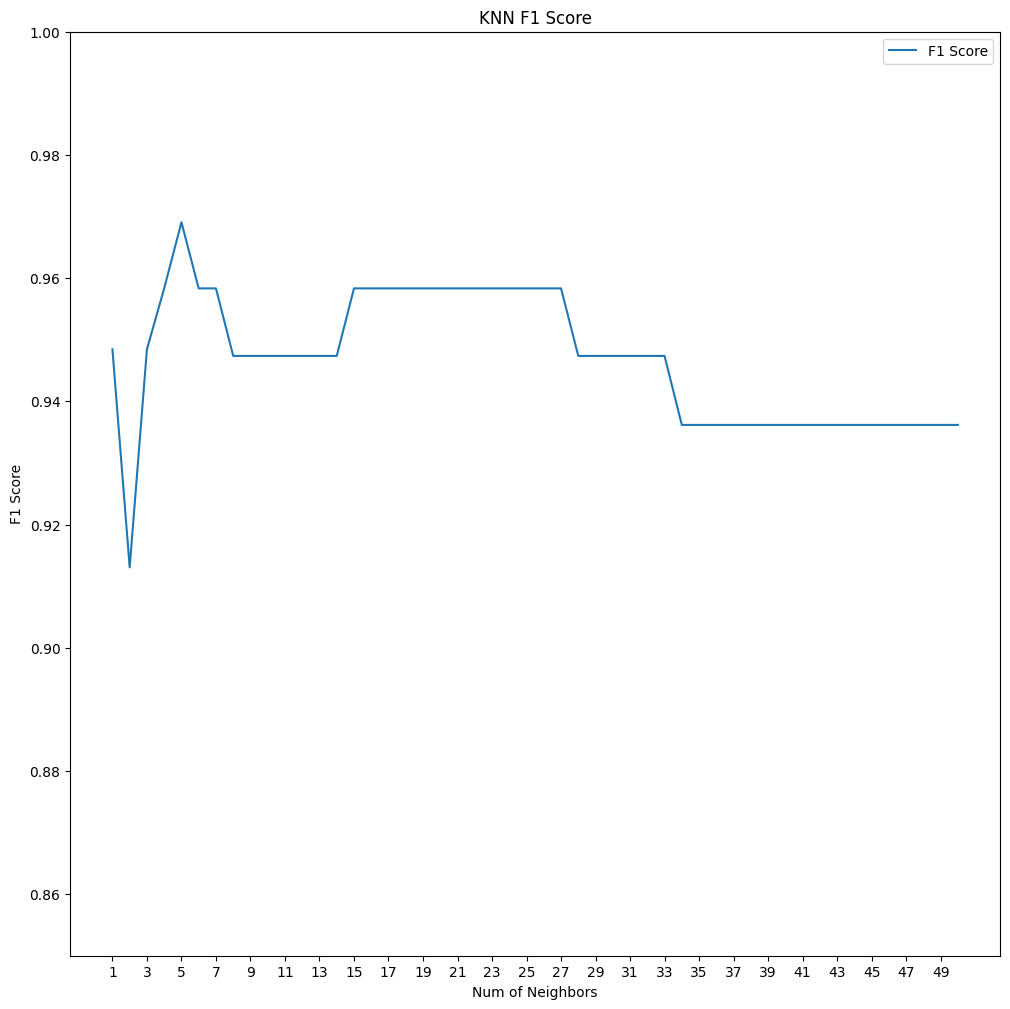

In [62]:
ax = f1_scores.plot(figsize=(12, 12))
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.ylim((0.85, 1))
plt.title('KNN F1 Score')

So in this case we can see that our previous guess of k=5 turns out to be the best perfoming choice. However, since there is so little variation between different values of k, this is likely highly dependent on the selection of data for test/train sets. In the end, for a simple model like KNN this is still an impressive result/